In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4
#import thread

/tmp/ipykernel_3795/2875171863.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#this is the training data for our models.
filepath='/home/vedanshi/Documents/DSML/IMD work/HARv2_d10km_d_2d_prcp_nc_2023.nc'
data=xr.open_dataset(filepath,engine='netcdf4')
data

<xarray.Dataset> Size: 141MB
Dimensions:      (time: 365, west_east: 381, south_north: 252)
Coordinates:
  * time         (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
  * west_east    (west_east) float32 2kB -1.675e+06 -1.665e+06 ... 2.125e+06
  * south_north  (south_north) float32 1kB -7.45e+05 -7.35e+05 ... 1.765e+06
    lon          (south_north, west_east) float32 384kB ...
    lat          (south_north, west_east) float32 384kB ...
Data variables:
    prcp_nc      (time, south_north, west_east) float32 140MB ...
Attributes: (12/33)
    TITLE:                HAR v2 d10km
    DATA_NOTES:           File generated with the output of successive model ...
    WRF_VERSION:           OUTPUT FROM WRF V4.1 MODEL
    CREATED_BY:           Frederik Bart - frederik.bart@tu-berlin.de
    INSTITUTION:          Technische Universität Berlin, Institut für Ökologi...
    CREATION_DATE:        03.03.2024 00:27:23
    ...                   ...
    GRID_X00:             -1675001.0
    GRID_Y00:             -744999.0
    GRID_X01:             -1675001.0
    GRID_Y01:             1765001.0
    GRID_NX:              381
    GRID_NY:              252

In [3]:
data.lon.values

array([[ 66.684105,  66.77981 ,  66.875534, ..., 103.400215, 103.49444 ,
        103.588615],
       [ 66.66832 ,  66.76411 ,  66.859924, ..., 103.41976 , 103.51407 ,
        103.60834 ],
       [ 66.6525  ,  66.748375,  66.844284, ..., 103.43935 , 103.53374 ,
        103.62809 ],
       ...,
       [ 61.529263,  61.653564,  61.777935, ..., 109.74759 , 109.86862 ,
        109.98958 ],
       [ 61.502087,  61.626537,  61.751057, ..., 109.78086 , 109.90203 ,
        110.02312 ],
       [ 61.474846,  61.59944 ,  61.724106, ..., 109.81422 , 109.935524,
        110.05675 ]], dtype=float32)

In [4]:
data.prcp_nc.max()

<xarray.DataArray 'prcp_nc' ()> Size: 4B
array(30.272669, dtype=float32)

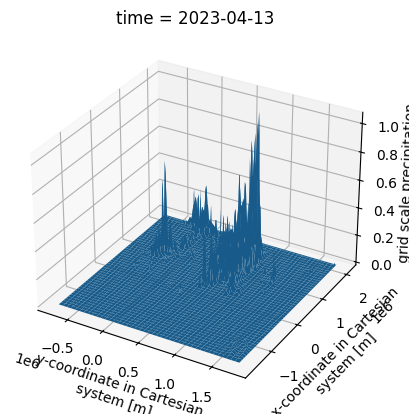

In [5]:
data.prcp_nc[102].T.plot.surface()

<xarray.DataArray 'prcp_nc' ()> Size: 4B
array(0.46642962, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2023-01-01

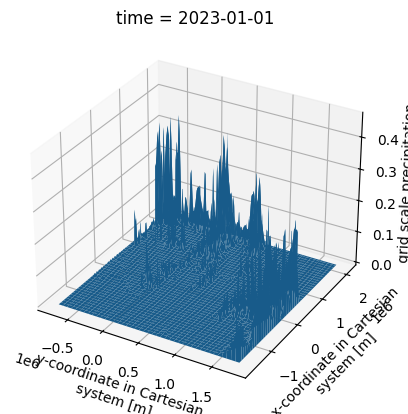

In [6]:
data.prcp_nc[0, :, :].T.plot.surface()
data.prcp_nc[0].max()

visualizing latitude and longitude as south_north and west_east

In [7]:
print(len(data.lon.values))
print(len(data.lat.values))
df1=pd.DataFrame(data.lon)
df1

252
252


,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
0,66.684105,66.779808,66.875534,66.971291,67.067085,67.162903,67.258751,67.354622,67.450531,67.546463,...,102.739655,102.834129,102.928566,103.022964,103.117332,103.211662,103.305962,103.400215,103.494438,103.588615
1,66.668320,66.764107,66.859924,66.955772,67.051651,67.147560,67.243492,67.339462,67.435455,67.531479,...,102.758598,102.853157,102.947685,103.042175,103.136627,103.231041,103.325417,103.419762,103.514069,103.608337
2,66.652496,66.748375,66.844284,66.940216,67.036186,67.132179,67.228210,67.324265,67.420349,67.516464,...,102.777580,102.872231,102.966835,103.061409,103.155952,103.250450,103.344917,103.439346,103.533737,103.628090
3,66.636642,66.732613,66.828606,66.924637,67.020691,67.116783,67.212898,67.309044,67.405220,67.501427,...,102.796600,102.891335,102.986031,103.080688,103.175316,103.269897,103.364449,103.458961,103.553436,103.647881
4,66.620758,66.716820,66.812904,66.909019,67.005173,67.101349,67.197556,67.293793,67.390060,67.486351,...,102.815651,102.910469,103.005257,103.099998,103.194710,103.289383,103.384018,103.478622,103.573181,103.667702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,61.583412,61.707420,61.831497,61.955635,62.079845,62.204117,62.328453,62.452858,62.577328,62.701859,...,108.833717,108.955032,109.076271,109.197433,109.318512,109.439514,109.560440,109.681282,109.802048,109.922729
248,61.556374,61.680527,61.804749,61.929039,62.053391,62.177814,62.302299,62.426849,62.551468,62.676147,...,108.865875,108.987328,109.108704,109.230003,109.351219,109.472359,109.593414,109.714394,109.835297,109.956116
249,61.529263,61.653564,61.777935,61.902370,62.026875,62.151443,62.276077,62.400780,62.525543,62.650375,...,108.898109,109.019699,109.141212,109.262650,109.384003,109.505280,109.626472,109.747589,109.868622,109.989578
250,61.502087,61.626537,61.751057,61.875641,62.000290,62.125008,62.249790,62.374641,62.499554,62.624535,...,108.930420,109.052155,109.173805,109.295380,109.416870,109.538277,109.659615,109.780861,109.902031,110.023117


In [8]:
#checking for duplicates 
print(sum(df1.duplicated()))

0


In [9]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,64.315659,64.424599,64.533577,64.642601,64.751671,64.860794,64.969948,65.079155,65.188408,65.297707,...,105.573700,105.680786,105.787827,105.894806,106.001740,106.108597,106.215424,106.322189,106.428894,106.535545
std,1.505533,1.497173,1.488803,1.480422,1.472030,1.463627,1.455215,1.446791,1.438357,1.429912,...,1.798917,1.806846,1.814763,1.822667,1.830559,1.838438,1.846304,1.854158,1.861999,1.869828
min,61.474846,61.599442,61.724106,61.848839,61.973640,62.098507,62.223438,62.348438,62.473503,62.598633,...,102.739655,102.834129,102.928566,103.022964,103.117332,103.211662,103.305962,103.400215,103.494438,103.588615
25%,63.062107,63.178029,63.294003,63.410031,63.526112,63.642248,63.758437,63.874678,63.990971,64.107317,...,104.002338,104.102510,104.202631,104.302711,104.402748,104.502745,104.602690,104.702595,104.802456,104.902277
50%,64.433887,64.542213,64.650585,64.758999,64.867458,64.975960,65.084507,65.193092,65.301723,65.410393,...,105.434704,105.541248,105.647739,105.754181,105.860569,105.966900,106.073185,106.179417,106.285587,106.391712
75%,65.630842,65.732479,65.834148,65.935860,66.037601,66.139378,66.241196,66.343040,66.444927,66.546846,...,107.072664,107.186396,107.300064,107.413666,107.527201,107.640678,107.754082,107.867424,107.980703,108.093916
max,66.684105,66.779808,66.875534,66.971291,67.067085,67.162903,67.258751,67.354622,67.450531,67.546463,...,108.962814,109.084686,109.206474,109.328186,109.449814,109.571358,109.692833,109.814217,109.935524,110.056747


In [10]:
df2=pd.DataFrame(data.lat)
df2

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
0,24.117298,24.131657,24.145931,24.160122,24.174231,24.188255,24.202196,24.216055,24.229830,24.243523,...,23.545547,23.528154,23.510681,23.493126,23.475491,23.457773,23.439978,23.422100,23.404140,23.386103
1,24.204641,24.219015,24.233309,24.247517,24.261642,24.275684,24.289644,24.303520,24.317312,24.331020,...,23.632185,23.614769,23.597275,23.579699,23.562040,23.544302,23.526484,23.508583,23.490602,23.472542
2,24.292004,24.306398,24.320707,24.334934,24.349077,24.363136,24.377113,24.391005,24.404814,24.418539,...,23.718842,23.701406,23.683889,23.666290,23.648611,23.630852,23.613010,23.595089,23.577087,23.559004
3,24.379389,24.393801,24.408129,24.422373,24.436533,24.450609,24.464603,24.478512,24.492338,24.506081,...,23.805521,23.788065,23.770525,23.752905,23.735205,23.717422,23.699560,23.681616,23.663591,23.645485
4,24.466797,24.481224,24.495569,24.509832,24.524010,24.538103,24.552114,24.566042,24.579884,24.593643,...,23.892221,23.874743,23.857183,23.839540,23.821817,23.804014,23.786129,23.768164,23.750116,23.731989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,45.844025,45.862785,45.881435,45.899979,45.918411,45.936737,45.954952,45.973061,45.991058,46.008945,...,45.096977,45.074253,45.051418,45.028481,45.005440,44.982292,44.959038,44.935677,44.912212,44.888641
248,45.930374,45.949150,45.967819,45.986378,46.004829,46.023170,46.041401,46.059528,46.077541,46.095448,...,45.182629,45.159882,45.137028,45.114071,45.091003,45.067833,45.044559,45.021179,44.997692,44.974098
249,46.016685,46.035480,46.054169,46.072742,46.091213,46.109570,46.127819,46.145962,46.163994,46.181915,...,45.268250,45.245480,45.222607,45.199623,45.176540,45.153347,45.130051,45.106647,45.083138,45.059525
250,46.102970,46.121780,46.140484,46.159077,46.177563,46.195938,46.214207,46.232361,46.250412,46.268349,...,45.353836,45.331047,45.308151,45.285149,45.262039,45.238827,45.215508,45.192085,45.168552,45.144920


In [11]:
#checking for duplicated
print(sum(df2.duplicated()))

0


In [12]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,35.174942,35.191544,35.208046,35.224453,35.240761,35.256981,35.273098,35.289120,35.305046,35.320877,...,34.513889,34.493782,34.473576,34.453281,34.432888,34.412403,34.391827,34.371159,34.350395,34.329540
std,6.426380,6.427682,6.428977,6.430263,6.431543,6.432815,6.434079,6.435335,6.436584,6.437826,...,6.374527,6.372950,6.371365,6.369773,6.368173,6.366567,6.364952,6.363331,6.361701,6.360065
min,24.117298,24.131657,24.145931,24.160122,24.174231,24.188255,24.202196,24.216055,24.229830,24.243523,...,23.545547,23.528154,23.510681,23.493126,23.475491,23.457773,23.439978,23.422100,23.404140,23.386103
25%,29.632568,29.648046,29.663434,29.678732,29.693941,29.709058,29.724087,29.739027,29.753875,29.768636,...,29.016231,28.997481,28.978644,28.959721,28.940711,28.921612,28.902428,28.883156,28.863798,28.844352
50%,35.185455,35.202059,35.218565,35.234978,35.251291,35.267511,35.283634,35.299660,35.315592,35.331423,...,34.524258,34.504145,34.483936,34.463634,34.443241,34.422752,34.402170,34.381496,34.360729,34.339869
75%,40.723102,40.740826,40.758447,40.775965,40.793383,40.810695,40.827907,40.845016,40.862019,40.878922,...,40.017271,39.995797,39.974226,39.952554,39.930781,39.908911,39.886940,39.864870,39.842698,39.820429
max,46.189217,46.208046,46.226768,46.245377,46.263882,46.282272,46.300556,46.318733,46.336796,46.354752,...,45.439388,45.416580,45.393661,45.370640,45.347511,45.324276,45.300934,45.277489,45.253937,45.230278


extracting latitude and longitude values for day one, i.e these values represent the data recorded on respective lon and lat on 1st day, 
#### Plan :
- make the method just for 1 day and then itrate over for the next 365 days.
- then interpolate for that day.

In [13]:
new_lat = data.lat[:,0].values
latitude = np.array(new_lat)
# Flatten the 2D array to a 1D array
#flattened_lat = new_lat.flatten()
# Iterate over the flattened array
#for lat in flattened_lat:
 #   latitude.append(lat)
df3=pd.DataFrame(latitude)
df3

,0
0,24.117298
1,24.204641
2,24.292004
3,24.379389
4,24.466797
...,...
247,45.844025
248,45.930374
249,46.016685
250,46.102970


In [14]:
new_lon = data.lon[0,:].values
longitude = np.array(new_lon)
# Flatten the 2D array to a 1D array
#flattened_lon = new_lon.flatten()
# Iterate over the flattened array
#for lon in flattened_lon:
 #   longitude.append(lon)
df4=pd.DataFrame(longitude)
df4

,0
0,66.684105
1,66.779808
2,66.875534
3,66.971291
4,67.067085
...,...
376,103.211662
377,103.305962
378,103.400215
379,103.494438


now i have to extract the precipitaion values in mm somehow form the prcp_nc variable.

In [15]:
import numpy as np
# Extracting precipitation data directly as a NumPy array
prcp_values = data['prcp_nc'][0, :, :].values
# Flatten the 2D array to a 1D array
prcp_values_flat = prcp_values.flatten()
# Now, prcp_values_flat contains all precipitation values as a 1D array
print(prcp_values_flat.max()==data.prcp_nc[0].max())
print((len(latitude)*len(longitude)==len(prcp_values_flat)))
print(len(prcp_values_flat))
print(len(latitude)*len(longitude))
prcp_values_flat.max()
# We have now gotten all the prcp values, now we have to fill them in a dataframe, but the dimenssions dont match 

<xarray.DataArray 'prcp_nc' ()> Size: 1B
array(True)
Coordinates:
    time     datetime64[ns] 8B 2023-01-01
True
96012
96012


0.46642962

In [16]:
x = prcp_values = data['prcp_nc'].shape
x

(365, 252, 381)

Making a function of the above process so as it can be used when we need to extract the infromation of the remaining days.

In [17]:
# i is the index at which all the data is to be exctracted, we will the above data only.
def extraction(i):
    lati=data.lat[:,i]
    lat=np.array(lati)
    longi=data.lon[i,:]
    lon=np.array(longi)
    prcp=data['prcp_nc'][i,:,:].values
    prcp_falt=prcp.flatten()
    return prcp_falt,lon,lat

### Maping of precipitaion vlaues.

In [18]:
indexr=[]
for i in range(252):
    indexr.append(i)
indexr

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [19]:
# Create a list of column labels based on the length of latitude
columns_labels = list(range(len(longitude)))
# Create an empty DataFrame with the correct number of columns
temp_df = pd.DataFrame(index=indexr, columns=columns_labels)
print(len(temp_df))
temp_df


252


,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#populating the data frame.
for i in range(381):
    for j in range(252):
        temp_df[i][j]=prcp_values_flat[i*j]
temp_df.index=latitude
temp_df.columns=longitude
temp_df

/tmp/ipykernel_3795/3440498368.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp_df[i][j]=prcp_values_flat[i*j]


,66.684105,66.779808,66.875534,66.971291,67.067085,67.162903,67.258751,67.354622,67.450531,67.546463,...,102.739655,102.834129,102.928566,103.022964,103.117332,103.211662,103.305962,103.400215,103.494438,103.588615
24.117298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.204641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24.292004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001411,0.000597,0.000343,0.000987,0.001753,0.002247,0.00195,0.00142,0.000853,0.000733
24.379389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125922,0.03834,0.014533,0.002826,0.001267,0.001291,0.002727,0.002435,0.001262,0.0005
24.466797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.067287,0.214263,0.203676,0.092037,0.013759,0.002991,0.00391,0.004616,0.002367,0.000768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45.844025,0.0,0.0,0.0,0.002842,0.003489,0.0,0.009409,0.00458,0.0,0.004065,...,0.062345,0.016057,0.0,0.105852,0.008799,0.0,0.189157,0.049676,0.000025,0.018762
45.930374,0.0,0.0,0.00034,0.000597,0.003277,0.0,0.214263,0.003941,0.0,0.007766,...,0.033391,0.010985,0.0,0.080779,0.019513,0.0,0.146342,0.075887,0.000014,0.019701
46.016685,0.0,0.0,0.002057,0.000695,0.001548,0.0,0.170578,0.004004,0.0,0.011071,...,0.171615,0.0084,0.000003,0.116988,0.019233,0.0,0.098049,0.08596,0.000011,0.023162
46.102970,0.0,0.0,0.003669,0.001753,0.0,0.0,0.013759,0.003406,0.0,0.278353,...,0.096558,0.019513,0.0,0.180283,0.039862,0.0,0.102111,0.103631,0.000008,0.026773


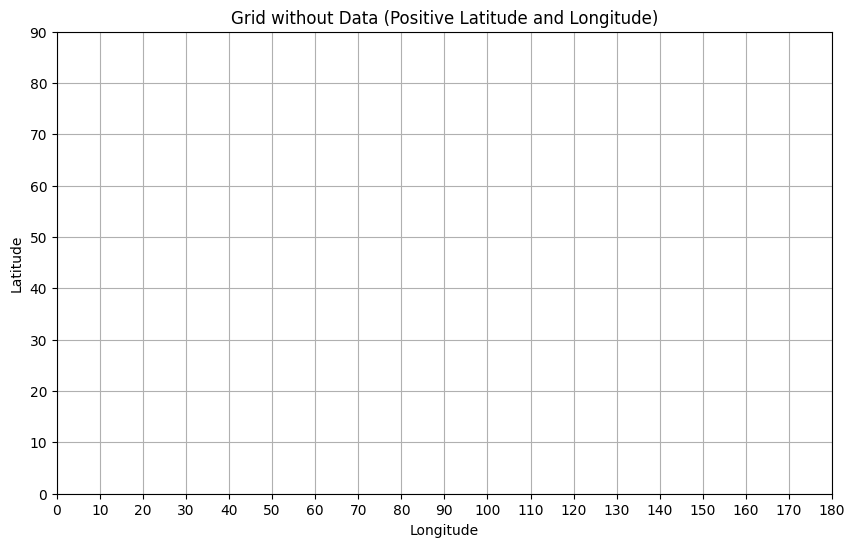

In [21]:
import matplotlib.pyplot as plt

# Define latitude and longitude ranges
lat_range = np.array(range(0, 91, 10))  # Positive latitude range (0 to 90)
lon_range = np.array(range(0, 181, 10))  # Positive longitude range (0 to 180)

# Plot the grid without any data
plt.figure(figsize=(10, 6))
plt.grid(True)  # Plot grid lines
plt.xticks(lon_range)  # Set x-axis ticks to longitude values
plt.yticks(lat_range)  # Set y-axis ticks to latitude values
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid without Data (Positive Latitude and Longitude)')

# Show the plot
plt.show()

In [22]:
# create a 2D grid of points for the HAR data
har_lat, har_lon = np.meshgrid(latitude, longitude)
len(har_lon)

381

In [23]:
inter=pd.read_excel(r'/home/vedanshi/Documents/DSML/IMD work/avalanche_glacier sites.xlsx')
inter.columns=[0,1,2,3,4,5,6,7,8,9,10]
inter

,0,1,2,3,4,5,6,7,8,9,10
0,lat,lon,NaN,NaN,NaN,lat,lon,NaN,NaN,lat,lon
1,32.2,77.2,NaN,NaN,NaN,30.5,78.7,NaN,NaN,30.9,79.31
2,32.3,77.2,NaN,NaN,NaN,30.4,78.6,NaN,NaN,30.65,79.33
3,32.4,77.1,NaN,NaN,NaN,30.4,78.7,NaN,NaN,31.9,78.86
4,32.4,77.3,NaN,NaN,NaN,30.4,78.8,NaN,NaN,32.31,77.63
5,32.5,77.1,NaN,NaN,NaN,30.3,78.6,NaN,NaN,32.13,77.2
6,32.5,77,NaN,NaN,NaN,30.3,78.7,NaN,NaN,32.15,77.51
7,32.6,77,NaN,NaN,NaN,30.2,78.4,NaN,NaN,30.53,80.1
8,32.6,77.1,NaN,NaN,NaN,30.1,78.8,NaN,NaN,32.9,77.1
9,32.3,77.1,NaN,NaN,NaN,30.1,79.1,NaN,NaN,32.5,77.48


In [24]:
to_be_found_lat=inter[1:][0]
to_be_found_lon=inter[1:][1]
to_be_found_lat

1     32.2
2     32.3
3     32.4
4     32.4
5     32.5
6     32.5
7     32.6
8     32.6
9     32.3
10    32.3
11    32.3
12    32.3
13    32.7
14    32.6
15    32.7
16    32.8
17    32.8
18    32.9
19    32.6
20    32.8
Name: 0, dtype: object

In [25]:
to_be_found_lon

1     77.2
2     77.2
3     77.1
4     77.3
5     77.1
6       77
7       77
8     77.1
9     77.1
10    77.6
11    77.4
12    77.5
13    77.2
14    76.9
15    76.7
16    76.7
17    76.8
18    76.8
19    77.4
20    77.3
Name: 1, dtype: object

# making grid.

x_values and y_values are the lat_renge and lon_range.

In [26]:
map_grid=np.empty((252,381),dtype=object)
# 252 - lat values.
# 381 - lon values. 

In [27]:
# function to calculate grid parameters
def calculate_grid_parameters(coord):
    d = np.diff(coord)[0] / 2
    print(d)
    cell_boundaries = np.concatenate([[coord[0] - d], coord + d])
    return cell_boundaries

In [28]:
# function to create grid cell taking arguments from x_values and y_values
def initialize_and_populate_grid(x_values, y_values): #x_values and y_value = latitude, longitude.
    ngrid_cell = len(x_values) * len(y_values)
    grid_cell = [{} for i in range(ngrid_cell)]
    dy = y_values[1] - y_values[0]
    k = 0
    
    latcell = calculate_grid_parameters(x_values)
    loncell = calculate_grid_parameters(y_values)
    
    for i, lat1  in enumerate(x_values):
        for j, lon1 in enumerate(y_values):
            x_coords = [round(latcell[i], 2), round(latcell[i], 2), round(latcell[i+1], 2), round(latcell[i+1], 2), round(latcell[i], 2)]
            y_coords = [round(loncell[j], 2), round(loncell[j+1], 2), round(loncell[j+1], 2), round(loncell[j], 2), round(loncell[j], 2)] if dy > 0 else \
                       [round(loncell[j+1], 2), round(loncell[j], 2), round(loncell[j], 2), round(loncell[j+1], 2), round(loncell[j+1], 2)]
            
            grid_cell[k] = {'X': x_coords, 'Y': y_coords, 'Xc': round(lat1, 2), 'Yc': round(lon1, 2)}
            k += 1
    return grid_cell

In [29]:
if __name__ == "__main__":
    grid_cell = initialize_and_populate_grid(latitude, longitude)
grid_cell

0.043671607971191406
0.0478515625


[{'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y': [66.64, 66.73, 66.73, 66.64, 66.64],
  'Xc': 24.12,
  'Yc': 66.68},
 {'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y': [66.73, 66.83, 66.83, 66.73, 66.73],
  'Xc': 24.12,
  'Yc': 66.78},
 {'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y': [66.83, 66.92, 66.92, 66.83, 66.83],
  'Xc': 24.12,
  'Yc': 66.88},
 {'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y': [66.92, 67.02, 67.02, 66.92, 66.92],
  'Xc': 24.12,
  'Yc': 66.97},
 {'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y': [67.02, 67.11, 67.11, 67.02, 67.02],
  'Xc': 24.12,
  'Yc': 67.07},
 {'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y': [67.11, 67.21, 67.21, 67.11, 67.11],
  'Xc': 24.12,
  'Yc': 67.16},
 {'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y': [67.21, 67.31, 67.31, 67.21, 67.21],
  'Xc': 24.12,
  'Yc': 67.26},
 {'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y': [67.31, 67.4, 67.4, 67.31, 67.31],
  'Xc': 24.12,
  'Yc': 67.35},
 {'X': [24.07, 24.07, 24.16, 24.16, 24.07],
  'Y':

In [30]:
temp_inter=[]
for i in range(1,21):
    interp=[to_be_found_lat[i],to_be_found_lon[i]]
    temp_inter.append(interp)
to_be_inter=pd.DataFrame(temp_inter)
to_be_inter

,0,1
0,32.2,77.2
1,32.3,77.2
2,32.4,77.1
3,32.4,77.3
4,32.5,77.1
5,32.5,77.0
6,32.6,77.0
7,32.6,77.1
8,32.3,77.1
9,32.3,77.6


In [31]:
# Flatten the arrays to use in griddata
prcp_points = np.column_stack((har_lat.ravel(), har_lon.ravel()))
prcp=prcp_values_flat.ravel()

In [32]:
print(har_lat.ndim)
har_lat.ndim

2


2

In [33]:
har_lat

array([[24.117298, 24.204641, 24.292004, ..., 46.016685, 46.10297 ,
        46.189217],
       [24.117298, 24.204641, 24.292004, ..., 46.016685, 46.10297 ,
        46.189217],
       [24.117298, 24.204641, 24.292004, ..., 46.016685, 46.10297 ,
        46.189217],
       ...,
       [24.117298, 24.204641, 24.292004, ..., 46.016685, 46.10297 ,
        46.189217],
       [24.117298, 24.204641, 24.292004, ..., 46.016685, 46.10297 ,
        46.189217],
       [24.117298, 24.204641, 24.292004, ..., 46.016685, 46.10297 ,
        46.189217]], dtype=float32)

In [34]:
har_lon

array([[ 66.684105,  66.684105,  66.684105, ...,  66.684105,  66.684105,
         66.684105],
       [ 66.77981 ,  66.77981 ,  66.77981 , ...,  66.77981 ,  66.77981 ,
         66.77981 ],
       [ 66.875534,  66.875534,  66.875534, ...,  66.875534,  66.875534,
         66.875534],
       ...,
       [103.400215, 103.400215, 103.400215, ..., 103.400215, 103.400215,
        103.400215],
       [103.49444 , 103.49444 , 103.49444 , ..., 103.49444 , 103.49444 ,
        103.49444 ],
       [103.588615, 103.588615, 103.588615, ..., 103.588615, 103.588615,
        103.588615]], dtype=float32)

In [35]:
print("Shape of prcp_points:", prcp_points.shape)
print("Shape of prcp_values_flat:", prcp_values_flat.shape)
print("Shape of to_be_inter:", to_be_inter.shape)


Shape of prcp_points: (96012, 2)
Shape of prcp_values_flat: (96012,)
Shape of to_be_inter: (20, 2)


## Ineterpolating values

In [36]:
roundoff_lat=latitude.round(decimals=1)
roundoff_lon=longitude.round(decimals=1)
roundoff_lat

array([24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.6, 24.7, 24.8, 24.9, 25. ,
       25.1, 25.2, 25.3, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. ,
       26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9,
       28. , 28.1, 28.2, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       28.9, 29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.7, 29.8,
       29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.4, 30.5, 30.6, 30.7, 30.8,
       30.9, 31. , 31.1, 31.2, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8,
       31.9, 32. , 32. , 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8,
       32.8, 32.9, 33. , 33.1, 33.2, 33.3, 33.4, 33.5, 33.5, 33.6, 33.7,
       33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.3, 34.4, 34.5, 34.6, 34.7,
       34.8, 34.9, 35. , 35.1, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7,
       35.8, 35.8, 35.9, 36. , 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.6,
       36.7, 36.8, 36.9, 37. , 37.1, 37.2, 37.3, 37

In [37]:
roundoff_lon

array([ 66.7,  66.8,  66.9,  67. ,  67.1,  67.2,  67.3,  67.4,  67.5,
        67.5,  67.6,  67.7,  67.8,  67.9,  68. ,  68.1,  68.2,  68.3,
        68.4,  68.5,  68.6,  68.7,  68.8,  68.9,  69. ,  69.1,  69.2,
        69.3,  69.4,  69.5,  69.6,  69.7,  69.8,  69.9,  70. ,  70.1,
        70.1,  70.2,  70.3,  70.4,  70.5,  70.6,  70.7,  70.8,  70.9,
        71. ,  71.1,  71.2,  71.3,  71.4,  71.5,  71.6,  71.7,  71.8,
        71.9,  72. ,  72.1,  72.2,  72.3,  72.4,  72.5,  72.6,  72.7,
        72.8,  72.9,  73. ,  73.1,  73.2,  73.3,  73.3,  73.4,  73.5,
        73.6,  73.7,  73.8,  73.9,  74. ,  74.1,  74.2,  74.3,  74.4,
        74.5,  74.6,  74.7,  74.8,  74.9,  75. ,  75.1,  75.2,  75.3,
        75.4,  75.5,  75.6,  75.7,  75.8,  75.9,  76. ,  76.1,  76.2,
        76.3,  76.4,  76.5,  76.6,  76.7,  76.8,  76.9,  77. ,  77.1,
        77.2,  77.3,  77.4,  77.5,  77.6,  77.6,  77.7,  77.8,  77.9,
        78. ,  78.1,  78.2,  78.3,  78.4,  78.5,  78.6,  78.7,  78.8,
        78.9,  79. ,

the values rounded off above could be used to extrac the vlaues of y_true.

In [38]:
def accuracy(y_true,y_interpolated):
    # Calculate MAE
    mae = np.mean(np.abs(y_interpolated - y_true))
    # Calculate MSE
    mse = np.mean((y_interpolated - y_true)**2)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Calculate R^2 score
    mean_true = np.mean(y_true)
    r2 = 1 - np.sum((y_true - y_interpolated)**2) / np.sum((y_true - mean_true)**2)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)


In [39]:
def interpolate(coords,method_used):
    #entered coords must be upto accurcay of only 1 digit after the decimal.
    import scipy.interpolate as sci
    if method_used=='linear' or method_used=='bilinear':
        if method_used=='bilinear':
            return sci.griddata(prcp_points,prcp_values_flat,coords,method='nearest')
        else:
            return sci.griddata(prcp_points,prcp_values_flat,coords,method='linear')
    else :
            inter=sci.NearestNDInterpolator(prcp_points,prcp_values_flat,rescale=False,tree_options=None)
            return inter(coords)

In [41]:
interpolate(to_be_inter,'bilinear')

array([5.89320662e-05, 7.06018400e-05, 0.00000000e+00, 6.84815750e-05,
       0.00000000e+00, 5.95857680e-04, 3.06408270e-03, 0.00000000e+00,
       0.00000000e+00, 2.01217216e-02, 0.00000000e+00, 7.93184736e-05,
       1.46804159e-04, 7.65003715e-05, 9.24825261e-04, 5.33935241e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03057364e-05])

In [42]:
interpolate(to_be_inter,'linear')

array([2.65512479e-04, 1.03255719e-04, 2.84699443e-05, 3.82003452e-05,
       3.83042262e-05, 7.88756547e-04, 3.19001189e-03, 4.56315239e-05,
       2.82682332e-05, 9.95167240e-03, 3.59577957e-05, 9.98763345e-05,
       8.57357192e-05, 2.43454932e-03, 2.53040299e-03, 3.20373639e-02,
       5.31980853e-05, 2.59149718e-04, 3.98141377e-05, 6.19761163e-06])

In [43]:
interpolate(to_be_inter,'knn')

array([5.89320662e-05, 7.06018400e-05, 0.00000000e+00, 6.84815750e-05,
       0.00000000e+00, 5.95857680e-04, 3.06408270e-03, 0.00000000e+00,
       0.00000000e+00, 2.01217216e-02, 0.00000000e+00, 7.93184736e-05,
       1.46804159e-04, 7.65003715e-05, 9.24825261e-04, 5.33935241e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03057364e-05])